<a href="https://colab.research.google.com/github/ritikakhandelwal-17/Exploratory_Project-powertheftdetection/blob/main/feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [ ]:
daily_data=pd.read_csv("/content/drive/MyDrive/daily_dataset.csv.gz")
mean_cons=daily_data.groupby('day')['energy_sum'].mean()
mean_cons=pd.DataFrame(mean_cons)
mean_cons.reset_index(inplace=True)
mean_cons.columns=['date','mean energy']
mean_cons['date']= (pd.to_datetime(mean_cons['date']).dt.strftime('%Y/%m/%d'))
weather=pd.read_csv('/content/drive/MyDrive/weather_daily_darksky.csv')
weather['date']= (pd.to_datetime(weather['time']).dt.strftime('%Y/%m/%d'))
ndf=pd.DataFrame(columns=['date','icon','perciptype'])
ndf['date']=weather['date']
ndf['icon']=weather['icon']
ndf['perciptype']=weather['precipType']
ndf

,date,icon,perciptype
0,2011/11/11,fog,rain
1,2011/12/11,partly-cloudy-day,rain
2,2011/12/27,partly-cloudy-day,rain
3,2011/12/02,wind,rain
4,2011/12/24,partly-cloudy-night,rain
...,...,...,...
877,2014/01/26,partly-cloudy-day,rain
878,2014/02/27,partly-cloudy-day,rain
879,2014/03/09,partly-cloudy-night,rain
880,2014/02/12,wind,rain


In [ ]:
mean_cons

,date,mean energy
0,2011/11/23,6.952692
1,2011/11/24,8.536480
2,2011/11/25,9.499781
3,2011/11/26,10.267707
4,2011/11/27,10.850805
...,...,...
824,2014/02/24,10.411403
825,2014/02/25,10.294997
826,2014/02/26,10.202945
827,2014/02/27,10.356350


In [ ]:
mean_cons.set_index('date',inplace=True)
ndf.set_index('date',inplace=True)
final=mean_cons.merge(ndf,left_index=True,right_index=True)
final

,mean energy,icon,perciptype
date,,,
2011/11/23,6.952692,fog,rain
2011/11/24,8.536480,partly-cloudy-night,rain
2011/11/25,9.499781,partly-cloudy-day,rain
2011/11/26,10.267707,wind,rain
2011/11/27,10.850805,wind,rain
...,...,...,...
2014/02/24,10.411403,wind,rain
2014/02/25,10.294997,partly-cloudy-day,rain
2014/02/26,10.202945,partly-cloudy-day,rain


In [ ]:
final.reset_index(inplace=True)

In [ ]:
#month and day
final['date']= pd.to_datetime(final['date'])
final["day_name"] = final["date"].apply(lambda x : x.day_name())
final['month']= (final['date'].dt.strftime('%m'))
final

,date,mean energy,icon,perciptype,day_name,month
0,2011-11-23,6.952692,fog,rain,Wednesday,11
1,2011-11-24,8.536480,partly-cloudy-night,rain,Thursday,11
2,2011-11-25,9.499781,partly-cloudy-day,rain,Friday,11
3,2011-11-26,10.267707,wind,rain,Saturday,11
4,2011-11-27,10.850805,wind,rain,Sunday,11
...,...,...,...,...,...,...
824,2014-02-24,10.411403,wind,rain,Monday,02
825,2014-02-25,10.294997,partly-cloudy-day,rain,Tuesday,02
826,2014-02-26,10.202945,partly-cloudy-day,rain,Wednesday,02
827,2014-02-27,10.356350,partly-cloudy-day,rain,Thursday,02


In [ ]:
#holiday
holiday=pd.read_csv('/content/drive/MyDrive/uk_bank_holidays.csv')
holiday['date']= (pd.to_datetime(holiday['Bank holidays']).dt.strftime('%Y/%m/%d'))


In [ ]:
final['date']= pd.to_datetime(final['date']).dt.strftime('%Y/%m/%d')

final['holiday']=0
temp=list(holiday['date'])
for i in range (0,829):
  
  if (final['date'][i] in temp)==True:
   
    final['holiday'][i]=1



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
final.holiday.value_counts()

0    811
1     18
Name: holiday, dtype: int64

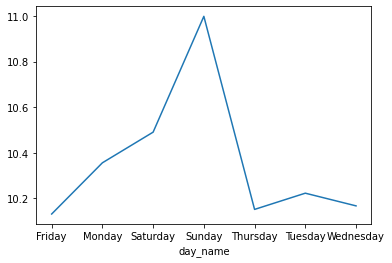

In [ ]:
final.groupby("day_name").mean()["mean energy"].plot()

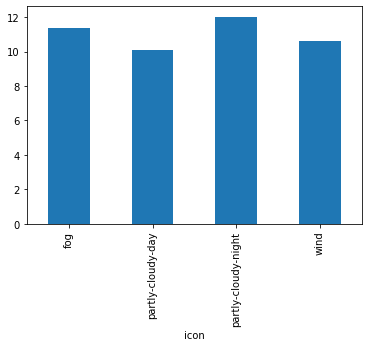

In [ ]:
final.groupby("icon").mean()["mean energy"].plot.bar()

In [ ]:
for i in range (0,829):
  d= (final['icon'][i])
  if d=='clear-day' or d=='cloudy' :
    final['icon'][i]='wind'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
#holiday+sunday
final['hol+sun']=0
for i in range (0,829):
  d= pd.to_datetime(final['date'][i])
  if ((final['date'][i] in temp)==True) or d.day_name()=='Sunday' :
    final['hol+sun'][i]=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
final

,date,mean energy,icon,perciptype,day_name,month,holiday,hol+sun,season,sun
0,2011/11/23,6.952692,fog,rain,Wednesday,11,0,0,autumn,0
1,2011/11/24,8.536480,partly-cloudy-night,rain,Thursday,11,0,0,autumn,0
2,2011/11/25,9.499781,partly-cloudy-day,rain,Friday,11,0,0,autumn,0
3,2011/11/26,10.267707,wind,rain,Saturday,11,0,0,autumn,0
4,2011/11/27,10.850805,wind,rain,Sunday,11,0,1,autumn,1
...,...,...,...,...,...,...,...,...,...,...
824,2014/02/24,10.411403,wind,rain,Monday,02,0,0,winter,0
825,2014/02/25,10.294997,partly-cloudy-day,rain,Tuesday,02,0,0,winter,0
826,2014/02/26,10.202945,partly-cloudy-day,rain,Wednesday,02,0,0,winter,0
827,2014/02/27,10.356350,partly-cloudy-day,rain,Thursday,02,0,0,winter,0


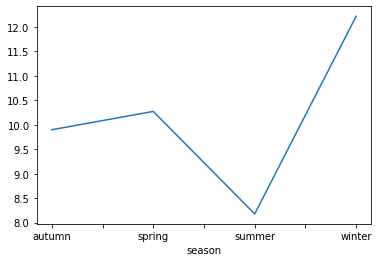

In [ ]:
final.groupby("season").mean()["mean energy"].plot()


In [ ]:
final['month']=final.month.astype('int')

In [ ]:
final.dtypes

date            object
mean energy    float64
icon            object
perciptype      object
day_name        object
month            int64
holiday          int64
hol+sun          int64
season           int64
dtype: object

In [ ]:
label_encoder = LabelEncoder()
final['icon'] = label_encoder.fit_transform(final['icon'] )
final['perciptype'] = label_encoder.fit_transform(final['perciptype'] )
final['day_name'] = label_encoder.fit_transform(final['day_name'] )
final

,date,mean energy,icon,perciptype,day_name,month,holiday,hol+sun,season
0,2011/11/23,6.952692,0,0,6,11,0,0,2
1,2011/11/24,8.536480,2,0,4,11,0,0,2
2,2011/11/25,9.499781,1,0,0,11,0,0,2
3,2011/11/26,10.267707,3,0,2,11,0,0,2
4,2011/11/27,10.850805,3,0,3,11,0,1,2
...,...,...,...,...,...,...,...,...,...
824,2014/02/24,10.411403,3,0,1,2,0,0,0
825,2014/02/25,10.294997,1,0,5,2,0,0,0
826,2014/02/26,10.202945,1,0,6,2,0,0,0
827,2014/02/27,10.356350,1,0,4,2,0,0,0


In [ ]:
corr=final.corr()

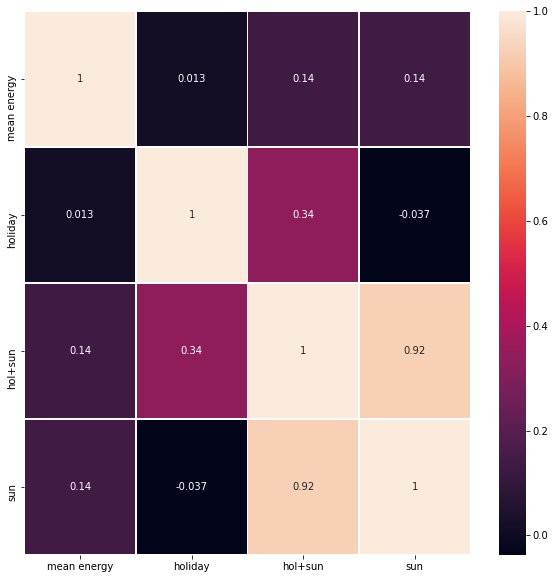

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax)

In [ ]:
feature=final.drop(['mean energy','icon','holiday'],1)

In [ ]:
feature

,date,perciptype,day_name,month,hol+sun,season
0,2011/11/23,0,6,11,0,2
1,2011/11/24,0,4,11,0,2
2,2011/11/25,0,0,11,0,2
3,2011/11/26,0,2,11,0,2
4,2011/11/27,0,3,11,1,2
...,...,...,...,...,...,...
824,2014/02/24,0,1,2,0,0
825,2014/02/25,0,5,2,0,0
826,2014/02/26,0,6,2,0,0
827,2014/02/27,0,4,2,0,0


In [ ]:
feature.to_csv( "/content/drive/MyDrive/feature_selection.csv", index=False, encoding='utf-8-sig')